# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587FA19 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587FA19issues.json

In [1]:
import os

#import cPickle as pickle

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [2]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587FA19issues.json')]

In [3]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [4]:
# Sanity test: print first 10 rows in our DataFrame

issues_df
    

,issue_number,created_at,closed_at,labels,State,Author
0,515,2019-11-11,2019-11-11,"[Category:Bug, DetectionPhase:Testing, Origina...",closed,SFA19SCM89C
1,513,2019-11-11,2019-11-11,[Address:2525-S-Martin-Luther-King-Dr-IL-60616...,closed,SFA19SCM89C
2,510,2019-11-10,2019-11-10,"[Address:3020 S Halsted St-Chicago-IL-60608, C...",closed,ZFA19SCM21X
3,509,2019-11-10,None,"[Category:Inquiry, DetectionPhase:Testing, Ori...",open,SPM587FA19
4,508,2019-11-10,None,"[Category:Inquiry, DetectionPhase:Testing, Ori...",open,SPM587FA19
...,...,...,...,...,...,...
332,5,2019-10-30,2019-10-31,"[Category:Inquiry, DetectionPhase:Field, Origi...",closed,SPM587FA19
333,4,2019-10-30,2019-10-30,"[Category:Enhancement, DetectionPhase:Design, ...",closed,SPM587FA19
334,3,2019-10-30,2019-10-30,"[Category:Bug, DetectionPhase:Coding, Originat...",closed,SPM587FA19
335,2,2019-10-28,2019-10-29,"[Category:Inquiry, DetectionPhase:Design, Orig...",closed,PFA19SCM29Z


In [5]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [6]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,SFA19SCM89C,closed,2019-11-11,2019-11-11,515,"[Category:Bug, DetectionPhase:Testing, Origina...",NaN,NaN,NaN,NaN,NaN
1,SFA19SCM89C,closed,2019-11-11,2019-11-11,513,[Address:2525-S-Martin-Luther-King-Dr-IL-60616...,NaN,NaN,NaN,NaN,NaN
2,ZFA19SCM21X,closed,2019-11-10,2019-11-10,510,"[Address:3020 S Halsted St-Chicago-IL-60608, C...",NaN,NaN,NaN,NaN,NaN
3,SPM587FA19,open,None,2019-11-10,509,"[Category:Inquiry, DetectionPhase:Testing, Ori...",NaN,NaN,NaN,NaN,NaN
4,SPM587FA19,open,None,2019-11-10,508,"[Category:Inquiry, DetectionPhase:Testing, Ori...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
332,SPM587FA19,closed,2019-10-31,2019-10-30,5,"[Category:Inquiry, DetectionPhase:Field, Origi...",NaN,NaN,NaN,NaN,NaN
333,SPM587FA19,closed,2019-10-30,2019-10-30,4,"[Category:Enhancement, DetectionPhase:Design, ...",NaN,NaN,NaN,NaN,NaN
334,SPM587FA19,closed,2019-10-30,2019-10-30,3,"[Category:Bug, DetectionPhase:Coding, Originat...",NaN,NaN,NaN,NaN,NaN
335,PFA19SCM29Z,closed,2019-10-29,2019-10-28,2,"[Category:Inquiry, DetectionPhase:Design, Orig...",NaN,NaN,NaN,NaN,NaN


In [7]:
for i in range(0, len(wrangled_issues_df)):
   if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            label_name= (label.split(':'))[0]
            label_value= (label.split(':'))[1]
            wrangled_issues_df.loc[i, label_name]=label_value
 

In [8]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status,Address,Latitude,Longitude,Longtitude
0,SFA19SCM89C,closed,2019-11-11,2019-11-11,515,"[Category:Bug, DetectionPhase:Testing, Origina...",Requirements,Testing,Bug,Critical,Approved,NaN,NaN,NaN,NaN
1,SFA19SCM89C,closed,2019-11-11,2019-11-11,513,[Address:2525-S-Martin-Luther-King-Dr-IL-60616...,Design,Design,Bug,Critical,Approved,2525-S-Martin-Luther-King-Dr-IL-60616,41.847200,-87.617190,NaN
2,ZFA19SCM21X,closed,2019-11-10,2019-11-10,510,"[Address:3020 S Halsted St-Chicago-IL-60608, C...",Requirements,Design,Bug,Critical,Approved,3020 S Halsted St-Chicago-IL-60608,NaN,NaN,NaN
3,SPM587FA19,open,None,2019-11-10,509,"[Category:Inquiry, DetectionPhase:Testing, Ori...",Coding,Testing,Inquiry,High,inProgress,NaN,NaN,NaN,NaN
4,SPM587FA19,open,None,2019-11-10,508,"[Category:Inquiry, DetectionPhase:Testing, Ori...",Documentation,Testing,Inquiry,High,inProgress,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,SPM587FA19,closed,2019-10-31,2019-10-30,5,"[Category:Inquiry, DetectionPhase:Field, Origi...",Field,Field,Inquiry,Major,inProgress,NaN,NaN,NaN,NaN
333,SPM587FA19,closed,2019-10-30,2019-10-30,4,"[Category:Enhancement, DetectionPhase:Design, ...",Field,Design,Enhancement,Major,Rejected,NaN,NaN,NaN,NaN
334,SPM587FA19,closed,2019-10-30,2019-10-30,3,"[Category:Bug, DetectionPhase:Coding, Originat...",Design,Coding,Bug,High,Approved,NaN,NaN,NaN,NaN
335,PFA19SCM29Z,closed,2019-10-29,2019-10-28,2,"[Category:Inquiry, DetectionPhase:Design, Orig...",Requirements,Design,Inquiry,Medium,inProgress,NaN,NaN,NaN,NaN


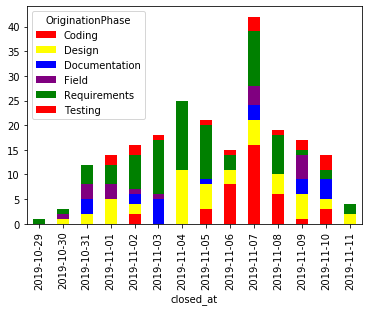

In [9]:
# Plot in Bar Chart the total number of issues closed for every orgination phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','OriginationPhase']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green'], grid=False)

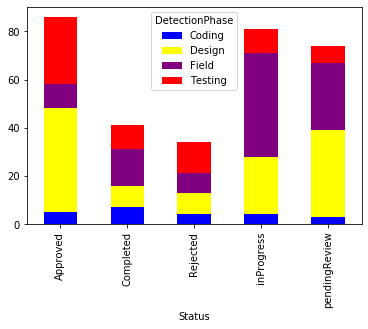

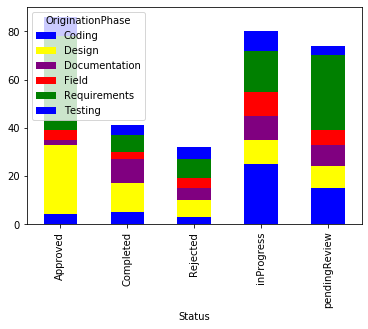

In [10]:
# Plot in Bar Chart the total number of issues created on every Detection Phase based on thier Status

LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

# Plot in Bar Chart the total number of issues created on every orgination phase based on thier Status

LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','OriginationPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

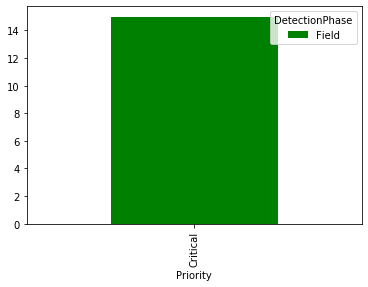

In [11]:
#Requirement 3 total number of issues in when DetectionPhase is Field AND Priority is Critical
dataf= wrangled_issues_df[['DetectionPhase','Priority']]
dataffinal=dataf[(dataf.DetectionPhase == 'Field') & (dataf.Priority == 'Critical')]
dataffinal.groupby(['Priority','DetectionPhase']).size().unstack().plot(kind='bar',stacked=True,color=['Green'])

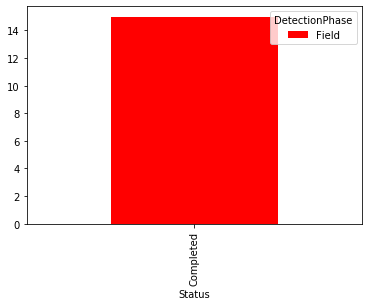

In [12]:
#Requirement 3 total number of issues in when DetectionPhase is Field AND Status is Completed
dataf= wrangled_issues_df[['Status','DetectionPhase']]
dataffinal=dataf[(dataf.DetectionPhase == 'Field') & (dataf.Status == 'Completed')]
dataffinal.groupby(['Status','DetectionPhase']).size().unstack().plot(kind='bar',stacked=True,color=['Red'])

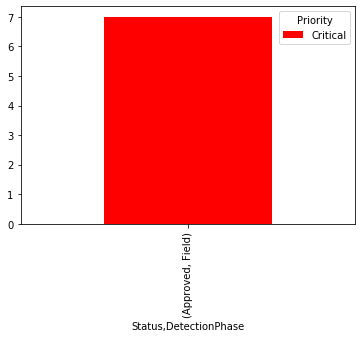

In [13]:
#Requirement 3 total number of issues in when DetectionPhase is Field AND Priority is Critical AND Status is Approved
dataf= wrangled_issues_df[['Status','DetectionPhase','Priority']]
dataffinal=dataf[(dataf.DetectionPhase == 'Field') & (dataf.Status == 'Approved') & (dataf.Priority == 'Critical')]
dataffinal.groupby(['Status','DetectionPhase','Priority']).size().unstack().plot(kind='bar',stacked=True,color=['Red',"Blue"])

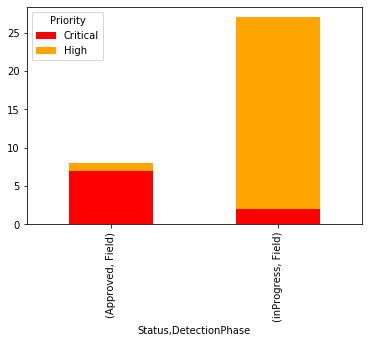

In [14]:
#Requirement 3 total number of issues in when DetectionPhase is Field AND Priority is Critical or High AND Status is Approved or inProgress
dataf= wrangled_issues_df[['Status','DetectionPhase','Priority']]
dataffinal=dataf[(dataf.DetectionPhase == 'Field') & ((dataf.Status == 'Approved') | (dataf.Status == 'inProgress')) & ((dataf.Priority == 'Critical') | (dataf.Priority == 'High'))]
dataffinal.groupby(['Status','DetectionPhase','Priority']).size().unstack().plot(kind='bar',stacked=True,color=['Red','Orange','Green'])